In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
dataset = pd.read_csv("/Users/varunsatheesh/Downloads/fin-dataset_2.csv")
X = dataset[['node_type','wlan_code_index','x(m)','y(m)','primary_channel','min_channel_allowed','max_channel_allowed','RSSI','SINR','average_airtime','average_interference']].values
y = dataset['throughput'].values

Text(0.5, 1.0, 'hp')

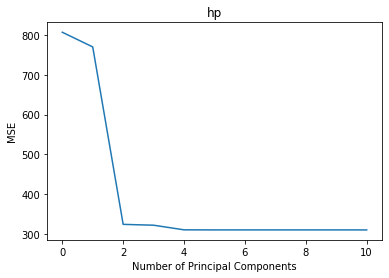

In [35]:
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 11):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [36]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([26.74, 46.09, 62.55, 76.62, 85.65])

In [37]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))
print (len(X_reduced_test[0]))

from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model=regressor.fit(X_reduced_train,y_train) 
#model.score(X_reduced_train,y_test)
#train PCR model on training data 

print(model.score(X_reduced_test,y_test))

#calculate RMSE
pred = model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

40.2096

5
0.8954312391535744


40.2096